# 机器学习 Homework 2
**吴博成 2193211134**


# Section 1 : 数据读取

In [1]:
import pandas as pd
import numpy as np
# 首先将缺失值中？表示替换为nan
data = pd.read_csv("breast-cancer-wisconsin.data",names=["Sample code number","Clump Thickness","Uniformity of Cell Size","Uniformity of Cell Shape","Marginal Adhesion","Single Epithelial Cell Size","Bare Nuclei","Bland Chromatin","Normal Nucleoli","Mitoses","Class"])
data.replace("?", np.nan , inplace = True)
data["Bare Nuclei"] = data["Bare Nuclei"].astype("float")

# Section 2 : 对数据集进行数据描述，包括样本数、特征数、特征信息、类别信息等

In [2]:
print("样本数: {}".format(data.shape[0]))
print("特征数: {}".format(data.shape[1]-2))
print("类别信息: column 11 :(良性2,恶性4)")
print('''特征信息: 
1. Clump Thickness               1 - 10
2. Uniformity of Cell Size       1 - 10
3. Uniformity of Cell Shape      1 - 10
4. Marginal Adhesion             1 - 10
5. Single Epithelial Cell Size   1 - 10
6. Bare Nuclei                   1 - 10
7. Bland Chromatin               1 - 10
8. Normal Nucleoli               1 - 10
9. Mitoses                       1 - 10
''')

样本数: 699
特征数: 9
类别信息: column 11 :(良性2,恶性4)
特征信息: 
1. Clump Thickness               1 - 10
2. Uniformity of Cell Size       1 - 10
3. Uniformity of Cell Shape      1 - 10
4. Marginal Adhesion             1 - 10
5. Single Epithelial Cell Size   1 - 10
6. Bare Nuclei                   1 - 10
7. Bland Chromatin               1 - 10
8. Normal Nucleoli               1 - 10
9. Mitoses                       1 - 10



# Section 3 : 分析数据集中数据缺失情况并处理缺失值

In [3]:
data.isnull().any()
# 由此可见,数据第7列，即Bare Nuclei有缺失值

Sample code number             False
Clump Thickness                False
Uniformity of Cell Size        False
Uniformity of Cell Shape       False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                     True
Bland Chromatin                False
Normal Nucleoli                False
Mitoses                        False
Class                          False
dtype: bool

In [4]:
# 接下来详细查看缺失数据
null_data = data[data.isnull()["Bare Nuclei"] == True]
display(null_data)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,NaN,7,3,1,4
40,1096800,6,6,6,9,6,NaN,7,8,1,2
139,1183246,1,1,1,1,1,NaN,2,1,1,2
145,1184840,1,1,3,1,2,NaN,2,1,1,2
158,1193683,1,1,2,1,3,NaN,1,1,1,2
164,1197510,5,1,1,1,2,NaN,3,1,1,2
235,1241232,3,1,4,1,2,NaN,3,1,1,2
249,169356,3,1,1,1,2,NaN,3,1,1,2
275,432809,3,1,3,1,2,NaN,2,1,1,2
292,563649,8,8,8,1,2,NaN,6,10,1,4


In [5]:
# 总共有699条数据，有缺失值数据16条，缺失值数量不多，可以直接删除含缺失值的样本
cleaned_data = data.dropna()

# Section 4 : 数据标准化为均值为0，方差为1的数据

In [6]:
import numpy as np
normalized_data = pd.DataFrame()
def Standard_Score(arr):
    mean = np.mean(arr)
    std = np.std(arr)
    return ((arr - mean)/std)
for (columnName, columnData) in cleaned_data.iteritems():
    normalized_data[columnName] = Standard_Score(columnData)
normalized_data["Sample code number"] = cleaned_data["Sample code number"]
normalized_data["Class"] = cleaned_data["Class"]
normalized_data.to_csv("normalized-breast-cancer-wisconsin.data",header=False,index=False,sep=',')
display(normalized_data)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,0.197905,-0.702212,-0.741774,-0.639366,-0.555608,-0.698853,-0.181827,-0.612927,-0.348400,2
1,1002945,0.197905,0.277252,0.262783,0.758032,1.695166,1.772867,-0.181827,-0.285105,-0.348400,2
2,1015425,-0.511643,-0.702212,-0.741774,-0.639366,-0.555608,-0.424217,-0.181827,-0.612927,-0.348400,2
3,1016277,0.552679,1.583204,1.602192,-0.639366,-0.105454,0.125054,-0.181827,1.354008,-0.348400,2
4,1017023,-0.156869,-0.702212,-0.741774,0.059333,-0.555608,-0.698853,-0.181827,-0.612927,-0.348400,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,-0.511643,-0.702212,-0.741774,-0.639366,-0.105454,-0.424217,-0.998853,-0.612927,-0.348400,2
695,841769,-0.866417,-0.702212,-0.741774,-0.639366,-0.555608,-0.698853,-0.998853,-0.612927,-0.348400,2
696,888820,0.197905,2.236180,2.271896,0.059333,1.695166,-0.149582,1.860738,2.337476,0.229166,4
697,897471,-0.156869,1.583204,0.932487,0.408682,-0.105454,0.125054,2.677764,1.026185,-0.348400,4


# Section 5 :构造训练集和测试集

## 留出法（Hold-out Method）

In [7]:
X = normalized_data.iloc[:,2:10]
y = normalized_data.Class # 2良性;4恶性
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X , y , test_size=0.3, random_state = None)
hold_out = {"train":{"X":X_train,"y":y_train},"test":{"X":X_test,"y":y_test}}

## K折交叉验证法 (Cross-validation Method)

In [8]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 10 , shuffle = False, random_state = None)
cross_validation = {}
group_number = 1
for train_row_number,test_row_number in kf.split(X):
   cross_validation["Group "+str(group_number)] = {"train":{"X":X.iloc[train_row_number],"y":y.iloc[train_row_number]},"test":{"X":X.iloc[test_row_number],"y":y.iloc[test_row_number]}}
   group_number += 1
display(cross_validation)

{'Group 1': {'train': {'X':      Uniformity of Cell Size  Uniformity of Cell Shape  Marginal Adhesion  \
   71                  2.236180                 -0.406921           1.806080   
   72                 -0.049236                 -0.072069          -0.290016   
   73                  0.277252                  0.597635           2.504778   
   74                  0.930228                  0.262783          -0.639366   
   75                 -0.702212                 -0.406921          -0.639366   
   ..                       ...                       ...                ...   
   694                -0.702212                 -0.741774          -0.639366   
   695                -0.702212                 -0.741774          -0.639366   
   696                 2.236180                  2.271896           0.059333   
   697                 1.583204                  0.932487           0.408682   
   698                 1.583204                  1.602192           0.758032   
   
        Sin

# Section 6 : 使用Logistic回归模型和决策树模型，完成训练和测试过程

## Logistic回归

In [9]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
score = {}
prediction = {}
for group in cross_validation.keys():
    X_train = cross_validation[group]["train"]["X"]
    y_train = cross_validation[group]["train"]["y"]
    X_test = cross_validation[group]["test"]["X"]
    y_test = cross_validation[group]["test"]["y"]
    logistic_model = logistic_model.fit(X_train,y_train)
    prediction[group] = logistic_model.predict(X_test)
    score[group] = logistic_model.score(X_test,y_test)
result = np.mean(list(score.values()))
print("logistic回归模型10个测试集预测结果为:{}".format(prediction))
print("logistic回归模型10折10次交叉验证法的精度:{}".format(result))

logistic回归模型10个测试集预测结果为:{'Group 1': array([2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4, 2, 4, 2,
       4, 2, 2, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4, 2, 4, 2, 2, 4, 2, 4,
       4, 2, 2], dtype=int64), 'Group 2': array([4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 4, 4, 4, 2,
       2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2,
       2, 2, 2], dtype=int64), 'Group 3': array([2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2,
       4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 4,
       4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 2,
       4, 4, 2], dtype=int64), 'Group 4': array([4, 4, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2, 4, 2,
       4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 4, 4, 4, 2, 2, 2,
       4, 4, 4, 4, 4, 4, 2, 4, 4, 4

## 决策树

In [10]:
from sklearn import tree
tree_clf = tree.DecisionTreeClassifier()
score = {}
prediction = {}
for group in cross_validation.keys():
    X_train = cross_validation[group]["train"]["X"]
    y_train = cross_validation[group]["train"]["y"]
    X_test = cross_validation[group]["test"]["X"]
    y_test = cross_validation[group]["test"]["y"]
    tree_clf = tree_clf.fit(X_train,y_train)
    prediction[group] = tree_clf.predict(X_test)
    score[group] = tree_clf.score(X_test,y_test)
result = np.mean(list(score.values()))
print("决策树模型10个测试集预测结果为:{}".format(prediction))
print("决策树模型10折10次交叉验证法的精度:{}".format(result))


决策树模型10个测试集预测结果为:{'Group 1': array([2, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4, 2, 4, 2,
       4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 4,
       4, 2, 2], dtype=int64), 'Group 2': array([4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4, 2, 4, 4, 4, 2,
       2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2,
       2, 2, 2], dtype=int64), 'Group 3': array([2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 4, 2,
       4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 4,
       4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 2,
       4, 4, 2], dtype=int64), 'Group 4': array([4, 4, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2, 4, 2,
       4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 2, 2,
       4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4,

# Section 7 : 性能度量 : 精度、混淆矩阵、查准率、查全率、F1指标，绘制ROC曲线并计算AUC值
## 为方便代码实现和展示，以下评估指标采用留出法进行度量

In [11]:
X_train = hold_out["train"]["X"]
y_train = hold_out["train"]["y"]
X_test = hold_out["test"]["X"]
y_test = hold_out["test"]["y"]
from sklearn.metrics import confusion_matrix
# 定义计算查全率(P)、查准率(R)和F1的函数
def calculate_P_R_and_F1(TP,FN,FP,TN):
    P = TP/(TP + FP)
    R = TP/(TP + FN)
    F1 = 2*P*R/(P+R)
    return (P,R,F1)


In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
plt.rcParams['font.sans-serif'] = ['SimHei']
def make_roc(y_test , X_test ,  model , title):
        y_score = model.predict_proba(X_test)[:,1]
        fpr, tpr ,thredhold = roc_curve(y_true = y_test, y_score = y_score,pos_label = 4)
        roc_auc = roc_auc_score(y_true = y_test, y_score = y_score)
        plt.plot(fpr, tpr, color='red',
                lw = 3, label='ROC curve (area = %0.4f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
        plt.xlabel('假正例率')
        plt.ylabel('真正例率')
        plt.title(title)
        plt.legend(loc="lower right")
        plt.show()
        return roc_auc

## Logistic回归

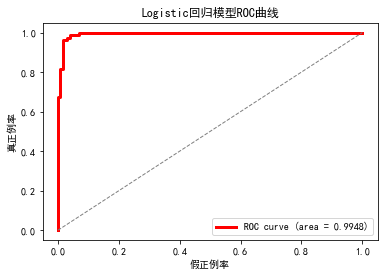

Logistic回归模型AUC值为: 0.9948254870129871


In [13]:
logistic_model = LogisticRegression()
logistic_model = logistic_model.fit(X_train,y_train)
y_pred = logistic_model.predict(X_test)
logistic_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred) # 混淆矩阵
(TP,FN,FP,TN) = list(logistic_matrix.reshape([4,1]))
(P,R,F1) = calculate_P_R_and_F1(TP,FN,FP,TN)
auc = make_roc(y_test,X_test,logistic_model,title = "Logistic回归模型ROC曲线")
print("Logistic回归模型AUC值为: {}".format(auc))

## 决策树

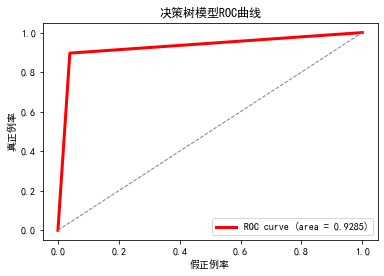

决策树模型AUC值为: 0.928520698051948


In [14]:
tree_clf = tree.DecisionTreeClassifier()
tree_clf = tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_test)
tree_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred)
(TP,FN,FP,TN) = list(tree_matrix.reshape([4,1]))
(P,R,F1) = calculate_P_R_and_F1(TP,FN,FP,TN)
auc = make_roc(y_test,X_test,tree_clf,title = "决策树模型ROC曲线")
print("决策树模型AUC值为: {}".format(auc))